# Regular expresions (RegEx)

- Online regex tester: https://regex101.com
- w3schools: https://www.w3schools.com/python/python_regex.asp
- re module documentation: https://docs.python.org/3/library/re.html

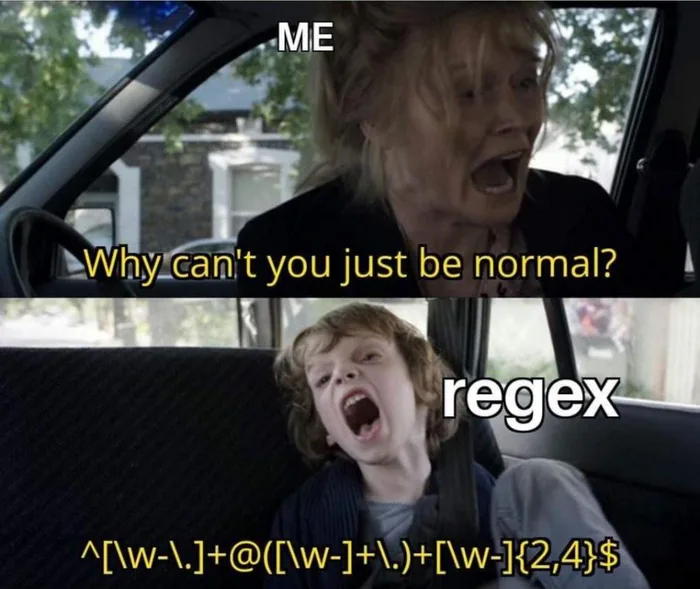

### Sintaxis

- **Literals** `a` 
- **Alternation** `a|b`
- **Character sets** `[ab]`, `[^ab]`
- **Wildcards** `.`
- **Escape special characters** `\` (?,*,+,^,&)
- **Ranges** `[a-d]`, `[1-9]`
- **Character classes** `\w`, `\d`, `\s`, `\n`, `\W`, `\D`, `\S`
- **Quantifiers** `{2}`, `{2,}`, `{2,4}`, `?`, `*`, `+`
- **Grouping** `()`
- **Anchors** `^`, `$`

### Methods

- **re.findall()**
- **re.sub()**
- **re.search()**
- **re.match()**
- **re.split()**

In [ ]:
import re

In [ ]:
text = "Pepe, Pepa and Luis are 22, 34, and 56 years old, respectively?"

In [ ]:
# literals
re.sub("Luis", "Lola", text)

In [ ]:
# alternation
text2 = re.sub("22|34", "40" , text)
print(text2)

In [ ]:
# character sets
text3 = re.sub("[2-4]", "5", text)
print(text3)

In [ ]:
# wildcards
text4 = re.sub("Pep..", "Felipe", text)
print(text4)

In [ ]:
# escape special characters
text5 = re.sub("\?", "!", text)
print(text5)

In [ ]:
# ranges
# re.findall
print(text)
print(re.findall("[a-df-z]", text))
print(re.findall("[A-Z]", text))
print(re.findall("[0-9]", text))

In [ ]:
# character classes
print(text)
print(re.findall("\w+", text))

In [ ]:
# quantifiers
text = "baa ba b a aa aaa aaaa aaaaa baba"
print(re.findall("a", text))
print(re.findall("a{2}", text))
print(re.findall("a{2,}", text))
print(re.findall("a*", text))
print(re.findall("a+", text))
print(re.findall("ba+", text))
print(re.findall("a?", text))
print(re.findall("(ba)+", text))

In [ ]:
# grouping
# re.search

text = "abctrc abc"

# re.findall("[a-z]{2}c{2}\sabc", text)
re.findall("([a-z]{2}c){2}\sabc", text)

In [ ]:
# anchors
text = "Ironhack is the best school"
inverse = "The best school is Ironhack"

print(re.search("^Ironhack", text))
print(re.search("^Ironhack", inverse))
print(re.search("Ironhack$", text))
print(re.search("Ironhack$", inverse))

In [ ]:
# re.search
# re.match
if re.search("a", "hola"):
    print("encontrado!")

print(re.search("a", "hola"))
print(re.match("a", "a"))

In [ ]:
# re.split
text = "Pepe, Pepa and Luis are 22, 34, and 56 years old, respectively?"
print(re.split("\d\d", text))

### Let's practice

You work for a very big company and you are assigned the task of verifying information from the 200 most important clients in Europe for a meeting with the board of directors in an hour. Execute the code below to see your dataframe.

In [ ]:
# loading dataframe
import pandas as pd
a = pd.read_csv('../data/db.csv')
display(a)

Oh no! It seems that one of the interns has messed up the `.csv` file, there is no backup, and you are to blame. In order to keep your job, you must find a way to restore the original data. But wait! There is no time to go through all the data manually. Good thing you know how to use `regular expressions`.

First of all, lets import the `regex` library and load our text file to a variable.
This is the data we must retrieve back:
- name
- phone
- email
- date
- contract_value
- creditcard
- country
- postalcode
- address

In [ ]:
import re

In [ ]:
with open('../data/db.csv') as file:
    db = file.read()
print(db)

In [ ]:
#name
name = re.findall(r"[A-Z][a-z]+\s[A-Z][a-z]+\s\+",db)
name = [re.sub("\s\+","", nombre) for nombre in name] 
print(len(name))

In [ ]:
#phone
phone = re.findall(r"\+[0-9]+\s[0-9]+\-[0-9]+", db)
print(len(phone))

In [ ]:
#email
email = re.findall(r"\S+@\S+",db)
# email = re.findall(r'(?i)[a-z0-9.]*@[a-z0-9.]*', db)
print(len(email))

In [ ]:
#date
date = re.findall(r"\S+\s\d{1,2},\s\S+",db)
# date = re.findall('[JFMASOND]{1}[a-z]{2}\s[0-9]+,\s[0-9]{4}', db)
print(len(date))

In [ ]:
#contract_value
# contract = re.findall(r"€[0-9,]+", db)
# contract = re.findall("€[0-9]+,[0-9]{2}")
contract = re.findall(r"€\S+", db)
print(len(contract))

In [ ]:
#creditcard
creditcard = re.findall("\d{4}.\d{4}.\d{4}.\d{4}",db)
print(len(creditcard))

In [ ]:
#country
country = re.findall("\d{4}.\d{4}.\d{4}.\d{4}\s\w+",db)
country = [re.sub("\d{4}.\d{4}.\d{4}.\d{4}\s","",e) for e in country]
country = [re.sub("United","United Kingdom",e) for e in country]
print(len(country))

In [ ]:
#address
# Creating regex expressions with | to that takes any value for name or country.
name_reg = '|'.join(set(name)).replace(' ','\s')
country_reg = '|'.join(set(country)).replace(' ','\s')
# Splitting db by country and of the resulting list, splitting each element by name
address = [re.split(name_reg,e) for e in re.split(country_reg,db)][1:]
# Taking the element corresponding to the addres and removing unwanted spaces 
# on begining and end
address = [e[0].strip() for e in address]
print(len(address))

In [ ]:
# Creating DataFrame

df = pd.DataFrame(list(zip(name,phone,email,date,contract,creditcard,country,address)), 
                  columns=['name','phone','email','date','contract','creditcard',
                           'country','address'])
display(df.head())
# df.to_csv('../data/df_cleaned.csv')

### Another case cleaning a csv

In [ ]:
import re
import pandas as pd

In [ ]:
raw_table =  """A Coruña 1973 413 1562 303 18.93 3.69
Álava 2118 360 1670 259 18.31 4.49
Albacete 1348 279 1051 171 18.34 4.15
Alicante 1328 212 1063 177 18.01 4.59
Almería 1242 323 974 245 18.80 3.60
Asturias 1729 285 1386 215 18.68 3.53
Ávila 1123 222 939 222 12.50 6.21
Badajoz 1276 252 998 193 19.74 4.63
Balears (Illes) 1963 239 1581 240 17.31 9.04
Barcelona 2709 632 2272 497 14.11 6.00
Burgos 1653 413 1311 318 18.52 3.30
Cáceres 1351 286 1046 247 21.41 6.81
Cádiz 1750 619 1409 478 17.39 4.27
Cantabria 2014 411 1628 321 17.16 3.77
Castellón 1174 309 889 197 20.46 5.13
Ceuta 2258 242 1927 260 14.85 5.07
Ciudad Real 1199 361 967 310 15.91 4.43
Córdoba 1450 296 1169 202 16.63 4.54
Cuenca 1267 447 1014 275 16.88 7.13
Girona 1935 328 1502 228 20.67 5.68
Granada 1592 344 1235 203 18.99 5.51
Guadalajara 1368 387 1125 324 15.81 4.82
Guipúzcoa 3855 861 3083 526 16.89 4.46
Huelva 1194 220 964 178 17.03 4.91
Huesca 1486 259 1136 122 22.26 6.10
Jaén 1357 390 1026 286 20.31 3.88
La Rioja 1415 346 1086 269 19.96 5.18
Las Palmas 1643 277 1362 217 14.27 4.53
León 1480 320 1100 218 22.78 4.67
Lleida 1193 347 907 274 21.65 3.75
Lugo 1554 325 1188 239 20.53 3.37
Madrid 2605 542 2316 459 9.88 5.22
Málaga 1714 205 1404 169 16.07 5.23
Melilla 1776 127 1573 134 11.57 8.57
Murcia 1338 421 969 254 23.07 5.33
Navarra 1971 455 1587 302 16.22 4.98
Ourense 1725 364 1203 182 25.44 5.06
Palencia 1481 259 1108 182 22.42 4.67
Pontevedra 1805 191 1398 111 19.16 5.31
Salamanca 1796 354 1395 237 20.51 4.89
Santa Cruz de Tenerife 1591 348 1338 269 13.52 3.76
Segovia 1568 358 1275 255 15.53 4.13
Sevilla 1799 395 1498 289 14.43 3.94
Soria 1441 389 1143 333 19.25 4.03
Tarragona 1570 401 1246 352 17.80 5.74
Teruel 1414 323 1166 331 19.99 12.01
Toledo 1273 511 1057 486 16.39 4.21
València 1508 448 1175 289 18.22 5.81
Valladolid 1505 368 1194 312 18.55 3.77
Vizcaya 2916 485 2457 440 14.96 3.19
Zamora 1355 278 1029 190 19.64 4.76
Zaragoza 1637 452 1305 373 17.99 4.27"""

Taken from [here](https://cris.maastrichtuniversity.nl/ws/portalfiles/portal/53635161/RM20029.pdf)

In [ ]:
# first_semicol = re.sub(r"(\D)\s(\d)", r"\1;\2", raw_table)
first_semicol = re.sub("(\D+)\s", r"\1;", raw_table)
first_semicol

In [ ]:
no_space_table = re.sub(r"(.)\s(\d)", r"\1;\2", raw_table)
no_space_table

In [ ]:
no_space_table.split('\n')

In [ ]:
df = pd.DataFrame([x.split(';') for x in no_space_table.split('\n')])
df

In [ ]:
df.columns = ['provincia', 'a', 'b', 'c', 'd', 'e', 'f']

In [ ]:
df

#### Aaaand... The last use case, with our drown friends

In [ ]:
df = pd.read_csv('../data/test_titanic.csv')

In [ ]:
df

In [ ]:
# df.Name.str.extract(r'')
# df.Name.str.extract(r'(),()')
# df.Name.str.extract(r'(?P<surname>),(?P<name>)')
# df.Name.str.extract(r'(?P<surname>.+), (?P<name>.+)')
# df.Name.str.extract(r'(?P<surname>.+),(?P<name>.+)')[['name', 'surname']]
df_names = df.Name.str.extract(r'(?P<surname>.+), (?P<title>Mr\.|Mrs\.|Ms\.|Master\.)*(?P<name>.+)')#[['title', 'name', 'surname']]


In [ ]:
df_names

In [ ]:
df_names[df_names.name.str.match(r'.*\..*')]

In [ ]:
df_names = df.Name.str.extract(r'(?P<surname>.+), (?P<title>Mr\.|Mrs\.|Ms\.|Master\.|Miss\.)*(?P<name>.+)')[['title', 'name', 'surname']]
df_names

In [ ]:
df_names[df_names.name.str.match(r'.*\..*')]

In [ ]:
df_names = df.Name.str.extract(r'(?P<surname>.+), (?P<title>.+\.)*(?P<name>.+)')[['title', 'name', 'surname']]
df_names

In [ ]:
df_names[df_names.name.str.match(r'.*\..*')]

In [ ]:
df_names

In [ ]:
# How to find families? Maybe with repeated surnames
df_names.groupby('surname').size().where(lambda x: x>1).dropna()

What's the difference between a single-series df and a series

In [ ]:
# If we want to include the count in the dataframe we need to add a call to one of the counted variables
df_names['n_names'] = df_names.groupby('surname')['surname'].transform('count')

In [ ]:
df_names[df_names.n_names>1]

BTW. Who was [Dona. Fermina Oliva y Ocana](https://es.wikipedia.org/wiki/Fermina_Oliva_y_Oca%C3%B1a)?

In [ ]:
df_names[df_names.n_names>1].sort_values('surname')